In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integ
import scipy.special as sf
import scipy.interpolate as interp
import matplotlib as m
import scipy.linalg as la
import scipy.optimize as opt
from astropy.io import ascii as k
from astropy import cosmology
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
np.set_printoptions(threshold=np.inf)


m.rc('xtick', direction='in', top=True)
m.rc('ytick', direction='in', right=True)
m.rc('xtick.minor', visible=True)
m.rc('ytick.minor', visible=True)

In [2]:
fits_table_filename = 'VI1_all.fits.gz'   # bottom half of image
hdul = fits.open(fits_table_filename)
data1 = Table(hdul[1].data)

fits_table_filename = 'VI2_all.fits.gz'  # top half of image
hdul = fits.open(fits_table_filename)
data2 = Table(hdul[1].data)

data = vstack([data1,data2])

ID = np.arange(len(data))
data['ID']=ID

### Original Plot of Data

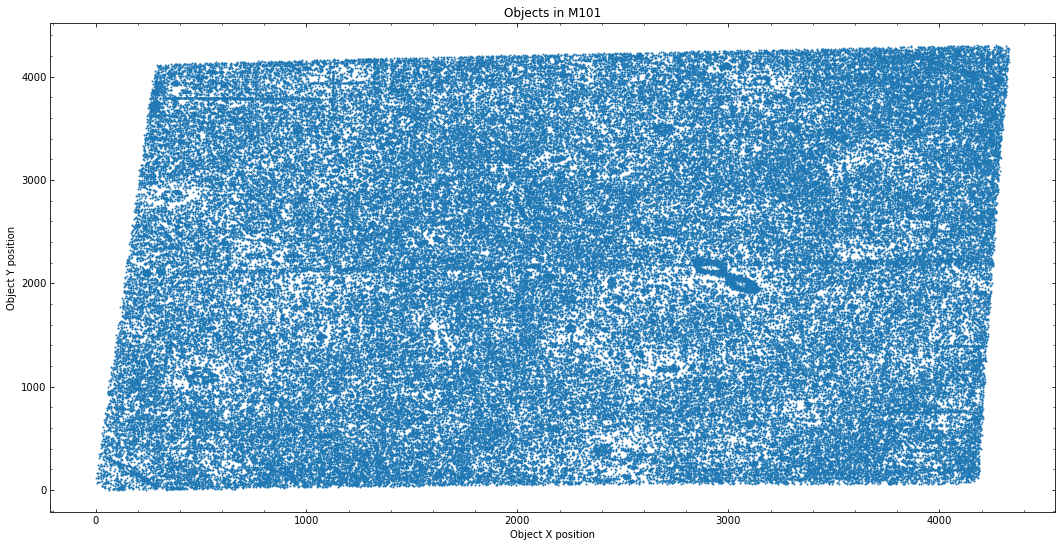

In [3]:
X,Y=data['col3'],data['col4']
plt.figure(figsize=(18,9))
plt.scatter(X,Y,s=1)
plt.title('Objects in M101')
plt.xlabel('Object X position')
plt.ylabel('Object Y position')
plt.show()

#### Plotting only stars

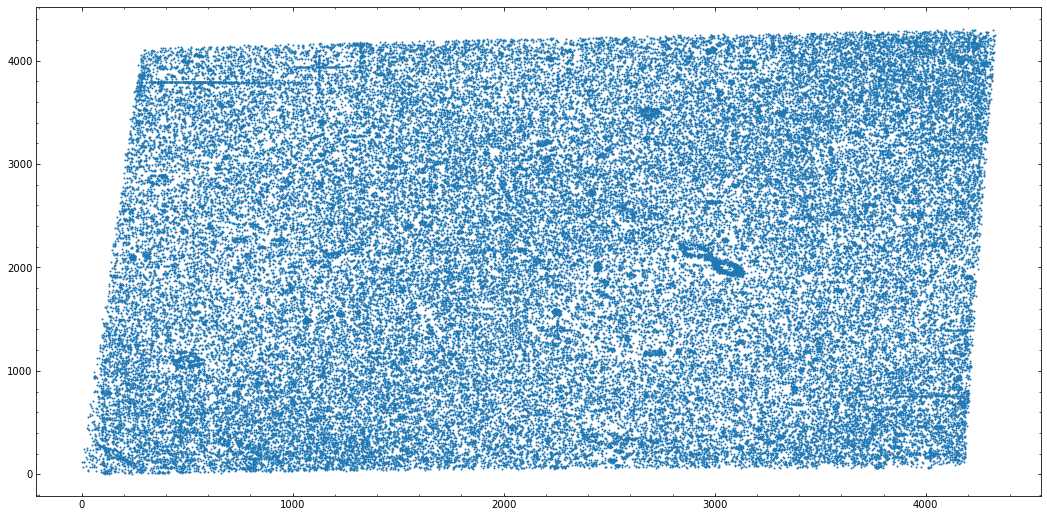

In [4]:
want = (data['col11']==1) #want all objects of type 1 (stars)
plt.figure(figsize=(18,9))
plt.scatter(X[want],Y[want],s=1)
plt.show()

#### Filtering in 814W

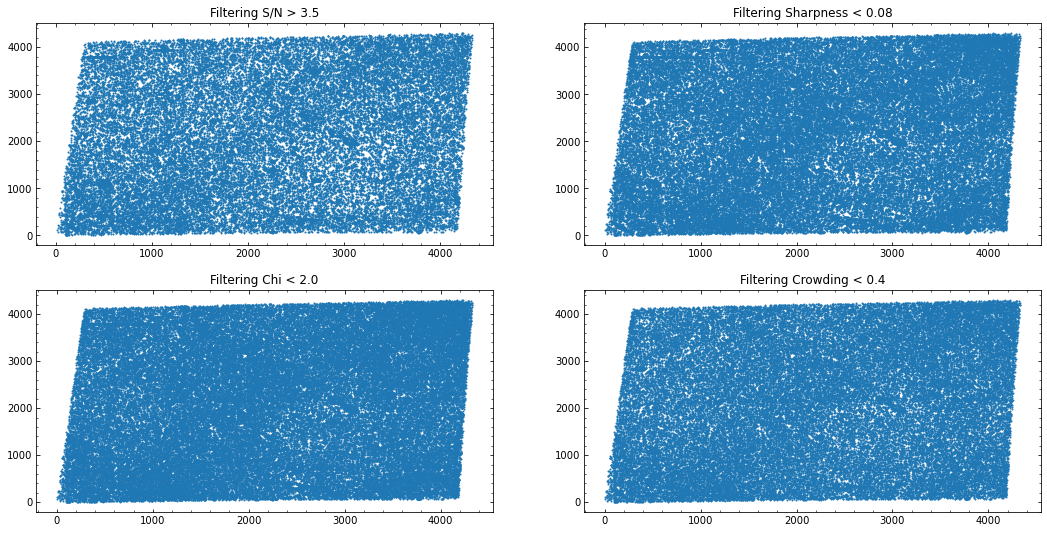

In [5]:
want2 = np.logical_and(want,data['col33']>3.5) #s/n
fig1 = plt.figure(figsize=(18,9))
ax1 = fig1.add_subplot(221)
ax1.scatter(X[want2],Y[want2],s=1)
plt.title('Filtering S/N > 3.5')

want3 = np.logical_and(want,data['col34']<0.08) #sharpness
ax2 = fig1.add_subplot(222)
ax2.scatter(X[want3],Y[want3],s=1)
plt.title("Filtering Sharpness < 0.08")


want4 = np.logical_and(want,data['col32']<2.0) #chi
ax3 = fig1.add_subplot(223)
ax3.scatter(X[want4],Y[want4],s=1)
plt.title("Filtering Chi < 2.0")

want1 = np.logical_and(want,data['col36']<0.4) #crowding
ax4 = fig1.add_subplot(224)
ax4.scatter(X[want1],Y[want1],s=1)
plt.title("Filtering Crowding < 0.4")

plt.show()


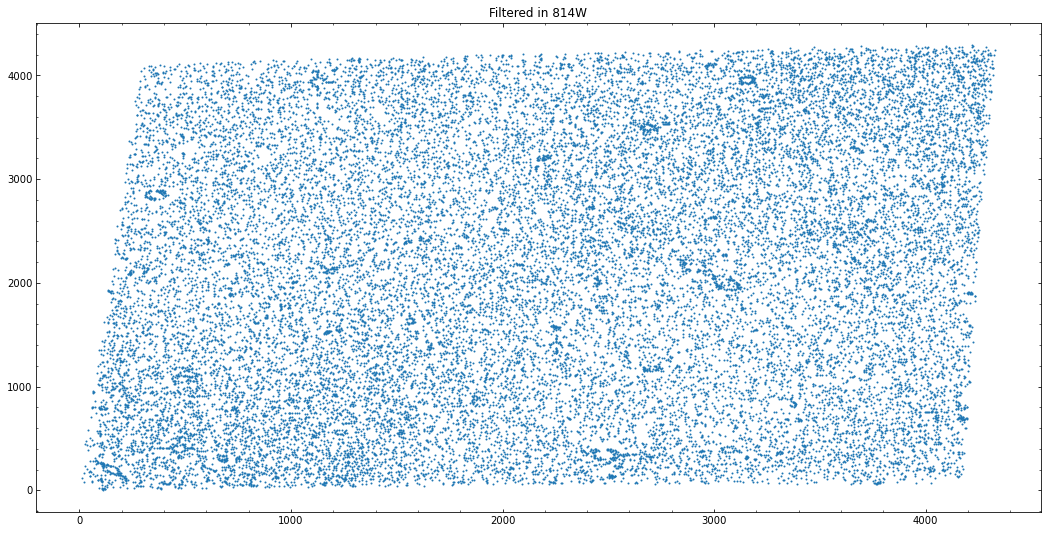

In [6]:
want0 = np.logical_and(want,data['col32']<2.0) #chi
want0 = np.logical_and(want0,data['col33']>3.5) #s/n
want0 = np.logical_and(want0,data['col34']<0.08) #sharpness
want0 = np.logical_and(want0,data['col36']<0.4) #Crowding < 0.4 mag

plt.figure(figsize=(18,9))
plt.scatter(X[want0],Y[want0],s=1)
plt.title('Filtered in 814W')
plt.show()

#### Filtering in 606W

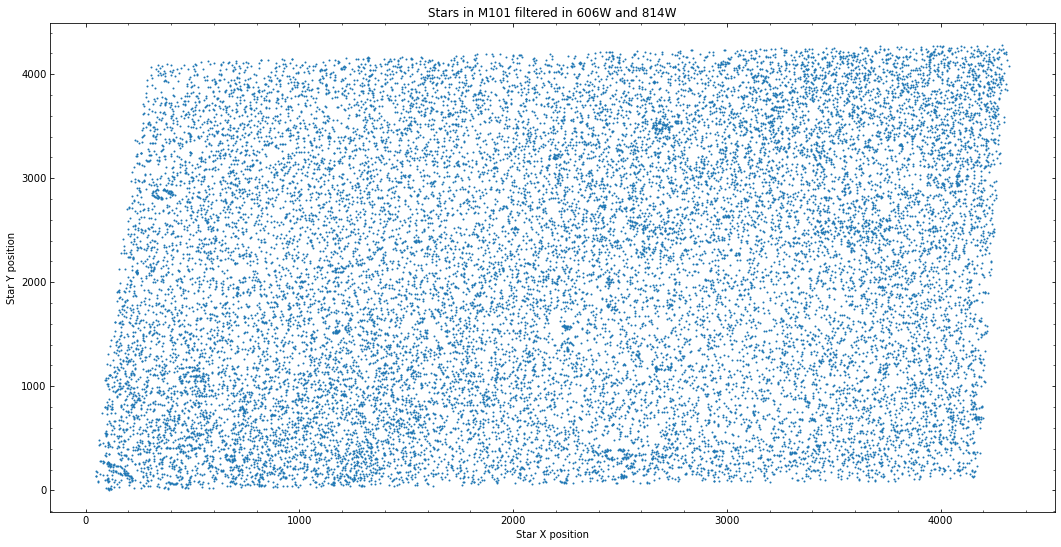

In [7]:
want0 = np.logical_and(want0,data['col19']<2.0) #Chi < 2.0
want0 = np.logical_and(want0,data['col20']>3.5) #S/N > 3.5
want0 = np.logical_and(want0,data['col21']<0.08) #Sharpness < 0.08
want0 = np.logical_and(want0,data['col23']<0.4) #Crowding < 0.4

plt.figure(figsize=(18,9))
plt.scatter(X[want0],Y[want0],s=1)
plt.title('Stars in M101 filtered in 606W and 814W')
plt.xlabel('Star X position')
plt.ylabel('Star Y position')
plt.show()



#### Constructing the CMD

col29 
------
19.328
19.432
19.672
21.118
20.123
 20.76
20.725
22.215
23.359
22.808
   ...
29.349
29.016
29.503
29.204
28.657
29.363
29.485
28.825
 29.03
28.799
28.833
Length = 22349 rows


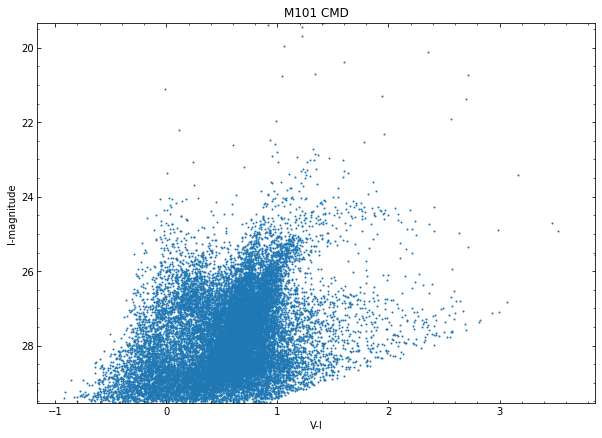

In [8]:
#use col29, col16 for plotting magnitude
sixmag = data['col16'] #V
eightmag = data['col29'] #I
c = sixmag[want0] - eightmag[want0] #V-I


i = eightmag[want0]
print(i)
plt.figure(figsize=(10,7))
plt.scatter(c,i,s=1)
plt.xlabel('V-I')
plt.ylabel('I-magnitude')
plt.title('M101 CMD')
plt.ylim(np.max(i),np.min(i))
plt.xlim(np.min(c),np.max(c))

plt.show()

### Looking for High Uncertainty Bright Stars

In [9]:
#filtering but with lower s/n ratio so we can get some higher unc objects

want1 = np.logical_and(want,data['col32']<2.0) #chi in 814
want1 = np.logical_and(want1,data['col34']<0.08) #sharpness in 814
want1 = np.logical_and(want1,data['col36']<0.4) #Crowding in 814
want1 = np.logical_and(want1,data['col33']>2) #S/N > 2 in 814

want1 = np.logical_and(want1,data['col19']<2.0) #Chi in 606
want1 = np.logical_and(want1,data['col21']<0.08) #Sharpness in 606
want1 = np.logical_and(want1,data['col23']<0.4) #Crowding in 606
want1 = np.logical_and(want1,data['col20']>2) #S/N > 2 in 606
#want1 = np.logical_and(want1, data['col16']>23)
want1 = np.logical_and(want1, data['col29']<26) #I magnitude filter
# want1 = np.logical_and(want1, data['col16']<26) #V magnitude filter

alldata = data[want1]
print(len(data))
print(len(alldata))

160979
1454


In [10]:
mag606visits = np.array([alldata['col42'],alldata['col55'],
                             alldata['col68'],alldata['col81'],
                             alldata['col94'],alldata['col107'],
                             alldata['col120'],alldata['col133'],
                             alldata['col146'],alldata['col159'],
                             alldata['col172'],alldata['col185'],
                             alldata['col198'],alldata['col211'],
                             alldata['col224'],alldata['col237'],
                             alldata['col250'],alldata['col263'],
                             alldata['col276'],alldata['col289'],
                             alldata['col302'],alldata['col315'],
                             alldata['col328'],alldata['col341'],
                             alldata['col354'],alldata['col367'],
                             alldata['col380'],alldata['col393']])


mag814visits = np.array([alldata['col406'],alldata['col419'],
                             alldata['col432'],alldata['col445'],
                             alldata['col458'],alldata['col471'],
                             alldata['col484'],alldata['col497'],
                             alldata['col510'],alldata['col523'],
                             alldata['col536'],alldata['col549'],
                             alldata['col562'],alldata['col575'],
                             alldata['col588'],alldata['col601'],
                             alldata['col614'],alldata['col627'],
                             alldata['col640'],alldata['col653'],
                             alldata['col666'],alldata['col679'],
                             alldata['col692'],alldata['col705']])

#transpose array so each row is a star and columns are magnitudes
mag814visits = mag814visits.T
mag606visits = mag606visits.T

In [11]:
#replace 99.999 values with nans (probably isn't necessary because cleaning cells)
mag814visits[mag814visits==99.999] = np.nan
mag606visits[mag606visits==99.999] = np.nan

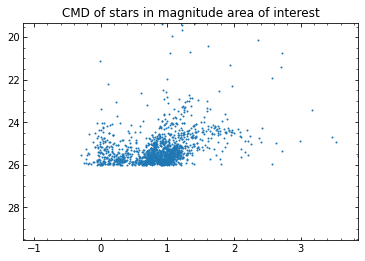

In [12]:
#use col29, col16 for plotting magnitude
sixmag1 = alldata['col16'] #V
eightmag1 = alldata['col29'] #I
c1 = sixmag1 - eightmag1 #V-I

i1 = eightmag1
plt.scatter(c1,i1,s=1)
plt.ylim(np.max(i),np.min(i))
plt.xlim(np.min(c),np.max(c))
plt.title('CMD of stars in magnitude area of interest')
plt.show()

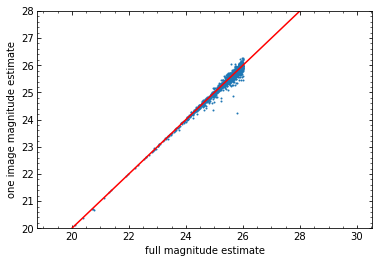

In [13]:
plt.scatter(alldata['col29'],alldata['col432'], s=1)

plt.ylim(20,28)
plt.xlabel('full magnitude estimate')
plt.ylabel('one image magnitude estimate')
plt.plot([20,30],[20,30],color = 'red')
plt.show()

In [14]:
mean814 = np.nanmean(mag814visits,axis=1)
print(len(mean814))
#print(mean814)

mean606 = np.nanmean(mag606visits,axis=1)
print(len(mean606))
#print(mean606)

mag_range = np.nanmax(mag814visits,axis=1) - np.nanmin(mag814visits,axis=1)
len(mag_range)

1454
1454


1454

In [15]:
Imag = alldata['col29'] #814
Vmag = alldata['col16'] #606

In [16]:
from astropy.stats import sigma_clipped_stats
avg814,median814,stddev814 = sigma_clipped_stats(mag814visits,axis=1)
# magvar = np.logical_and(stddev>0.1,Imag<23)

avg606,median606,stddev606 = sigma_clipped_stats(mag606visits,axis=1)

#sigma clip ignores outliers and looks at the scatter of just the top points so it is less confusing

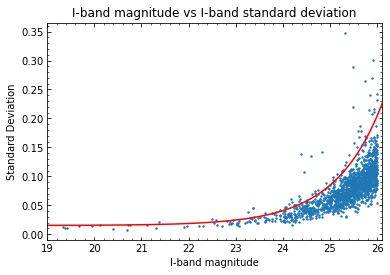

In [17]:
plt.scatter(Imag,stddev814,s=2)
plt.xlim(19,26.1)
plt.xlabel('I-band magnitude')
plt.ylabel('Standard Deviation')
plt.title('I-band magnitude vs I-band standard deviation')

stddev_array = np.array([0.01, 0.015, 0.02, 0.04, 0.065, 0.08])
Imag_array = np.array([19.35, 22, 23, 24, 24.7, 25])

# plt.plot([19.35,22],[0.01,0.015],color = 'red')
# plt.plot([22,23],[0.015,0.02],color = 'red')
# plt.plot([23,24],[0.02,0.04],color = 'red')
# plt.plot([24,24.7],[0.04,0.065],color = 'red')
# plt.plot([24.7,25],[0.065,0.08],color = 'red')
x = np.arange(18,26.2,0.01)
y = 0.015 + 0.155*np.exp(x-25.8)
plt.plot(x,y,color = 'red');

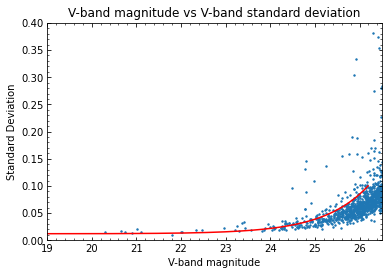

In [18]:
plt.scatter(Vmag,stddev606,s=2)
plt.xlim(19,26.5)
plt.ylim(0,0.4)
x = np.arange(18,26.2,0.01)
y = 0.012 + 0.12*np.exp(x-26.5)
plt.xlabel('V-band magnitude')
plt.ylabel('Standard Deviation')
plt.title('V-band magnitude vs V-band standard deviation')

plt.plot(x,y,color = 'red');

In [19]:
crit814 = 0.015 + 0.155*np.exp(Imag - 25.8) #this is the version of the function that we're using
# crit2 = 0.015 + 0.15*np.exp(Imag - 25.5)
crit606 = 0.012 + 0.12*np.exp(Vmag-26.5)

In [20]:
want_var814 = np.logical_and(stddev814 > crit814, Imag < 25.8) 
want_var606 = np.logical_and(stddev606 > crit606, Vmag < 26.5)
print(len(want_var606))
print(len(want_var814))
want_var = np.logical_and(want_var606, want_var814)
print(len(want_var))

1454
1454
1454


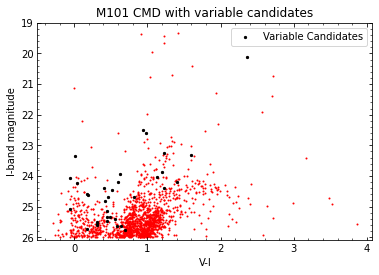

In [21]:
#plot color mag diagram for everything and then plot the things overtop.
plt.scatter(Vmag - Imag,Imag,s = 1,color = 'red')
plt.ylim(26.1,19)
# plt.scatter(c,i,s=1)
# plt.ylim(np.max(i),np.min(i))
# plt.xlim(np.min(c),np.max(c))
plt.scatter(Vmag[want_var] - Imag[want_var],Imag[want_var],s = 5,color = 'black',label = 'Variable Candidates')
#plt.scatter(Vmag[want_var] - Imag[want_var],Vmag[want_var],s = 5,color = 'green')
plt.xlabel('V-I')
plt.ylabel('I-band magnitude')
plt.title('M101 CMD with variable candidates')
plt.legend()
plt.show()

In [22]:
from astropy.time import Time
from astropy import units as u
timestring606 = ('2015-09-21 19:41:00','2015-09-22 04:48:28','2015-09-22 22:17:20','2015-09-23 01:28:03','2015-09-23 04:38:46','2015-09-23 18:57:01','2015-09-23 22:07:44')

t606 = np.zeros(7)
for f in range(len(t606)):
    t606[f] = Time(timestring606[f]).mjd #time function and we want to convert this time into any units
    #modified julian date, a real number that is just a date in some unit of days
print(t606) #an array with all of the times in mjd

time_conv1 = 1320 / 60 / 60 / 24
time_conv2 = 1415 / 60 / 60 / 24

[57286.82013889 57287.20032407 57287.9287037  57288.06114583
 57288.19358796 57288.78959491 57288.92203704]


In [23]:
#getting precise times for each exposure 
date606 = np.zeros(28) 

date606[0] = t606[0] # time and date of visit 1
date606[1] = t606[0] + time_conv1 
date606[2] = t606[0] + time_conv1 + time_conv2
date606[3] = t606[0] + time_conv1 + (2 * time_conv2)

date606[4] = t606[1] # time and date of visit 2
date606[5] = t606[1] + time_conv1 
date606[6] = t606[1] + time_conv1 + time_conv2
date606[7] = t606[1] + time_conv1 + (2 * time_conv2)

date606[8] = t606[2] # time and date of visit 3
date606[9] = t606[2] + time_conv1 
date606[10] = t606[2] + time_conv1 + time_conv2
date606[11] = t606[2] + time_conv1 + (2 * time_conv2)

date606[12] = t606[3] # time and date of visit 4
date606[13] = t606[3] + time_conv1 
date606[14] = t606[3] + time_conv1 + time_conv2
date606[15] = t606[3] + time_conv1 + (2 * time_conv2)

date606[16] = t606[4] # time and date of visit 5
date606[17] = t606[4] + time_conv1 
date606[18] = t606[4] + time_conv1 + time_conv2
date606[19] = t606[4] + time_conv1 + (2 * time_conv2)

date606[20] = t606[5] # time and date of visit 6
date606[21] = t606[5] + time_conv1 
date606[22] = t606[5] + time_conv1 + time_conv2
date606[23] = t606[5] + time_conv1 + (2 * time_conv2)

date606[24] = t606[6] # time and date of visit 7
date606[25] = t606[6] + time_conv1 
date606[26] = t606[6] + time_conv1 + time_conv2
date606[27] = t606[6] + time_conv1 + (2 * time_conv2)

In [24]:
timestring814 = ('2015-09-24 01:18:28','2015-09-25 11:05:42','2015-09-25 17:26:51','2015-09-26 04:10:14','2015-09-26 07:44:56','2015-09-26 21:39:20')
t814 = np.zeros(6)

for g in range(len(t814)):
    t814[g] = Time(timestring814[g]).mjd
print(t814)

[57289.05449074 57290.46229167 57290.72697917 57291.17377315
 57291.32287037 57291.90231481]


In [25]:
date814 = np.zeros(24)
 
date814[0] = t814[0] # time and date of visit 1
date814[1] = t814[0] + time_conv1 
date814[2] = t814[0] + time_conv1 + time_conv2
date814[3] = t814[0] + time_conv1 + (2 * time_conv2)

date814[4] = t814[1] # time and date of visit 2
date814[5] = t814[1] + time_conv1 
date814[6] = t814[1] + time_conv1 + time_conv2
date814[7] = t814[1] + time_conv1 + (2 * time_conv2)

date814[8] = t814[2] # time and date of visit 3
date814[9] = t814[2] + time_conv1 
date814[10] = t814[2] + time_conv1 + time_conv2
date814[11] = t814[2] + time_conv1 + (2 * time_conv2)

date814[12] = t814[3] # time and date of visit 4
date814[13] = t814[3] + time_conv1 
date814[14] = t814[3] + time_conv1 + time_conv2
date814[15] = t814[3] + time_conv1 + (2 * time_conv2)

date814[16] = t814[4] # time and date of visit 5
date814[17] = t814[4] + time_conv1 
date814[18] = t814[4] + time_conv1 + time_conv2
date814[19] = t814[4] + time_conv1 + (2 * time_conv2)

date814[20] = t814[5] # time and date of visit 6
date814[21] = t814[5] + time_conv1 
date814[22] = t814[5] + time_conv1 + time_conv2
date814[23] = t814[5] + time_conv1 + (2 * time_conv2)

#### Time to make some light curves!

In [26]:
starID = alldata['ID']

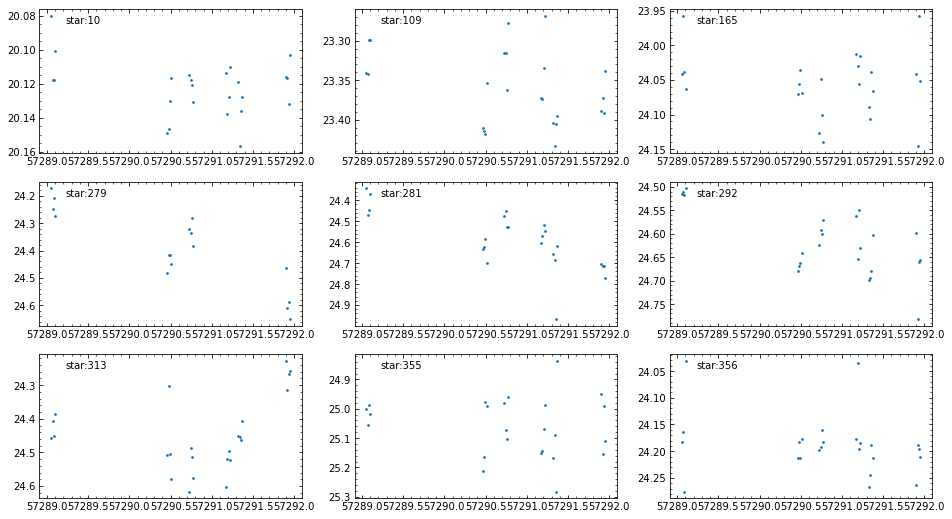

In [27]:
fig = plt.figure(figsize = (16,9))
for j in range(1,10):
    ax = plt.subplot(3,3, j)
    plt.scatter(date814, mag814visits[want_var][j-1],s = 3) 
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j-1]),transform = ax.transAxes)

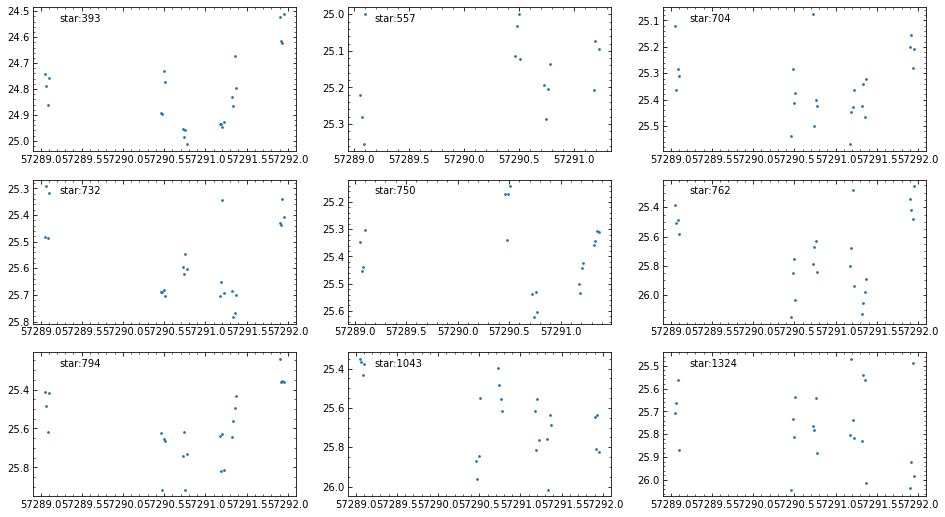

In [28]:
fig = plt.figure(figsize = (16,9))
for j in range(1,10):
#     plt.figure(figsize=(8,2))
    ax = plt.subplot(3,3, j)
    plt.scatter(date814, mag814visits[want_var][j+8],s = 3)   
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j+8]),transform = ax.transAxes)

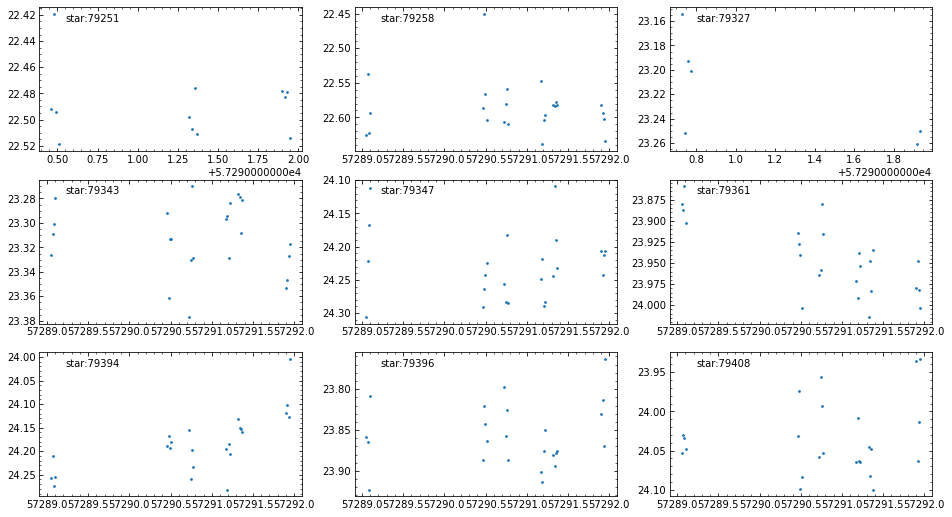

In [29]:
fig = plt.figure(figsize = (16,9))
for j in range(1,10):
#     plt.figure(figsize=(8,2))
    ax = plt.subplot(3,3, j)
    plt.scatter(date814, mag814visits[want_var][j+17],s = 3)    
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j+17]),transform = ax.transAxes)

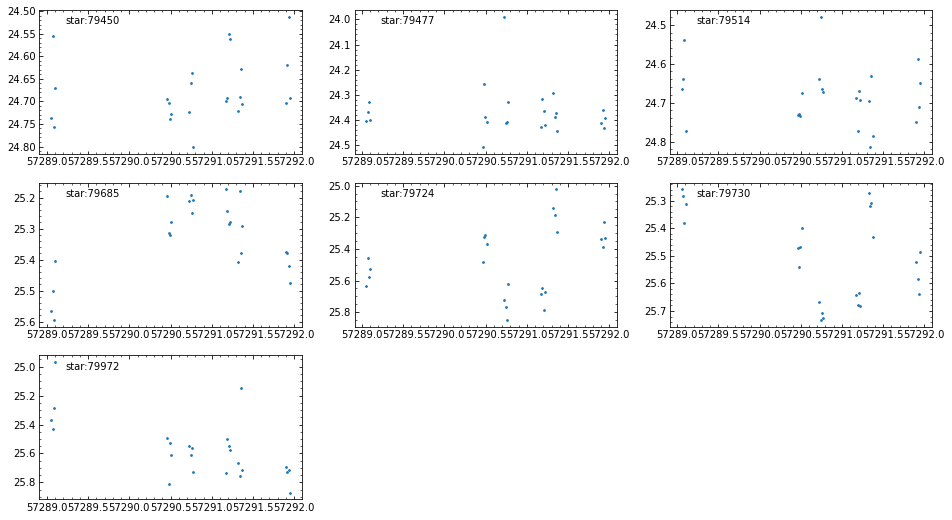

In [30]:
fig = plt.figure(figsize = (16,9))
for j in range(1,8):
#     plt.figure(figsize=(8,2))
    ax = plt.subplot(3,3, j)
    plt.scatter(date814, mag814visits[want_var][j+26],s = 3)   
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j+26]),transform = ax.transAxes)

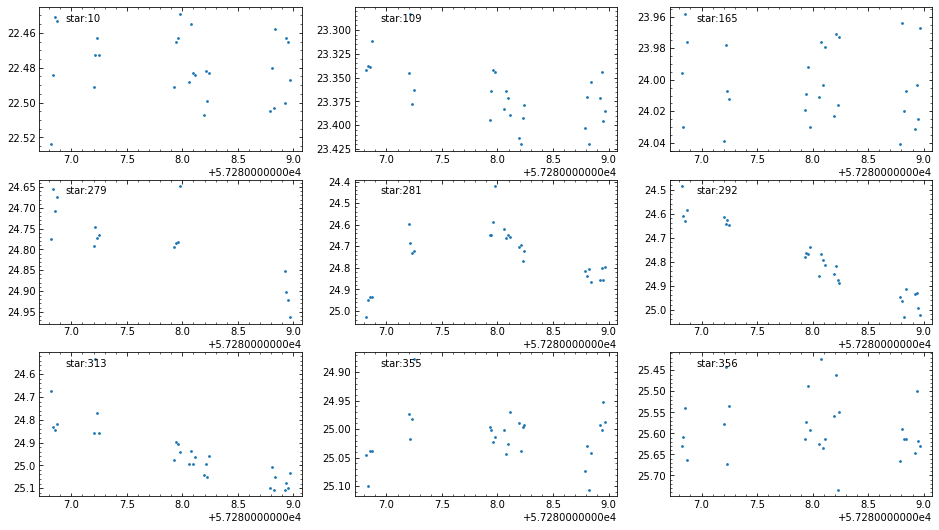

In [31]:
fig = plt.figure(figsize = (16,9))
for j in range(1,10):
#     plt.figure(figsize=(8,2))
    ax = plt.subplot(3,3, j)
    plt.scatter(date606, mag606visits[want_var][j-1],s = 3)   
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j-1]),transform = ax.transAxes)

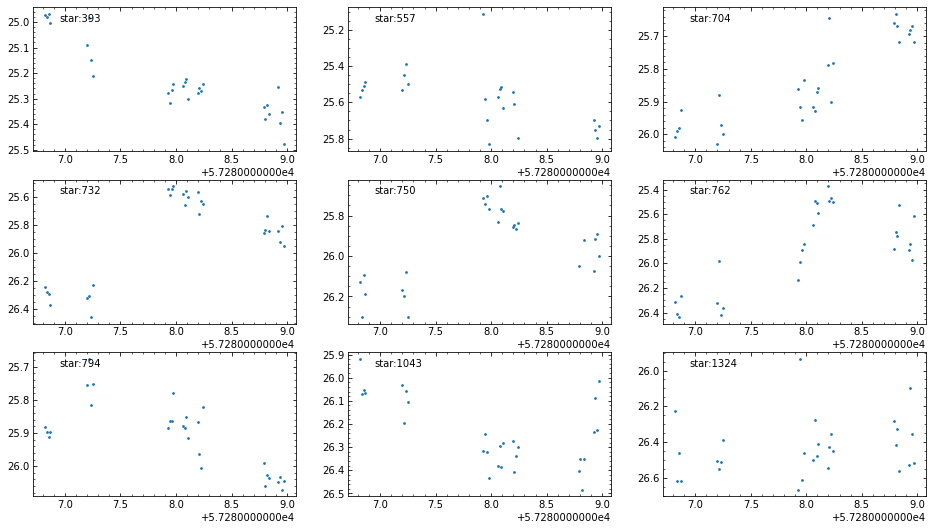

In [32]:
fig = plt.figure(figsize = (16,9))
for j in range(1,10):
#     plt.figure(figsize=(8,2))
    ax = plt.subplot(3,3, j)
    plt.scatter(date606, mag606visits[want_var][j+8],s = 3) 
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j+8]),transform = ax.transAxes)

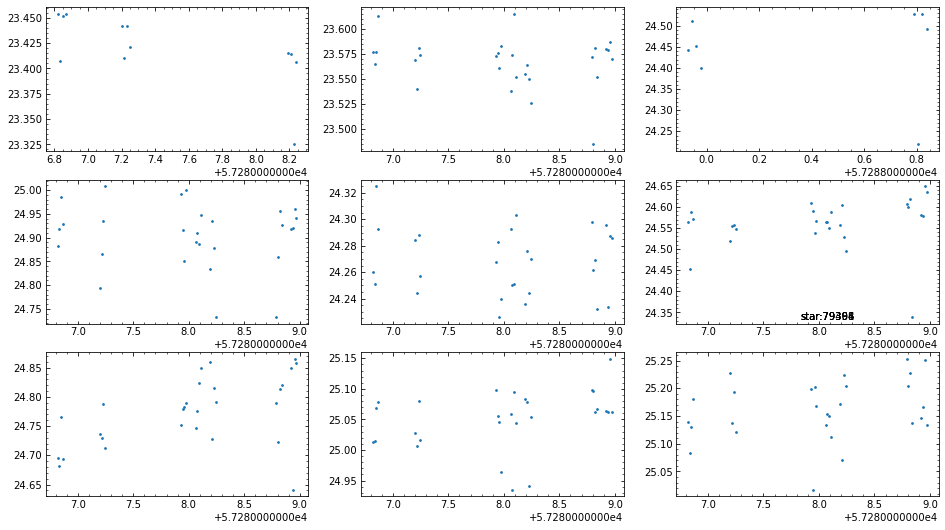

In [33]:
fig = plt.figure(figsize = (16,9))
for j in range(1,10):
    plt.subplot(3,3, j)
    plt.scatter(date606, mag606visits[want_var][j+17],s = 3)  
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j+17]),transform = ax.transAxes)

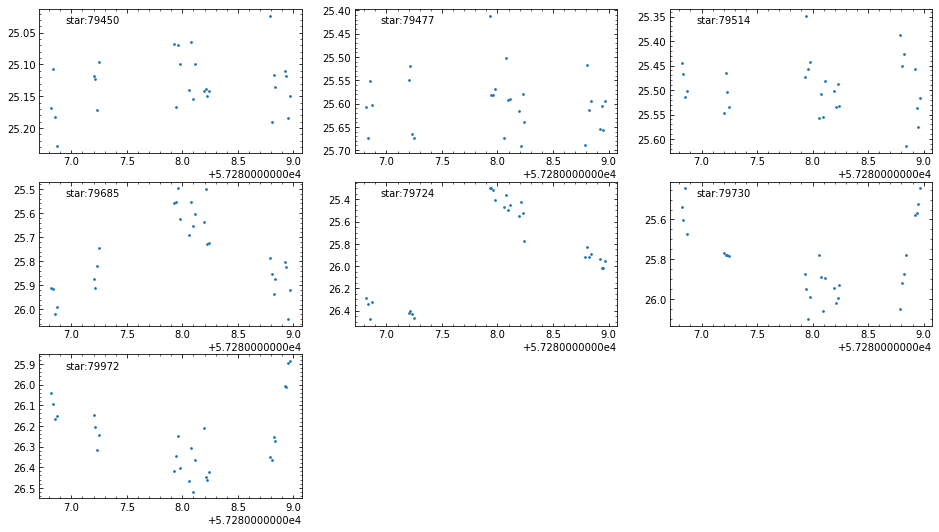

In [34]:
fig = plt.figure(figsize = (16,9))
for j in range(1,8):
    ax = plt.subplot(3,3, j)
    plt.scatter(date606, mag606visits[want_var][j+26],s = 3)   
    ax.invert_yaxis()
    plt.text(0.1, 0.9, 'star:{}'.format(starID[want_var][j+26]),transform = ax.transAxes)

In [35]:
#for the star ids that we want to use, use this code:

wantIDs = [279, 281, 292, 313, 557, 704, 732, 750, 762, 794, 1043, 79685, 79724, 79730, 79972] #IDs of all stars that look promising. all stars found in 814 were also found in 606 but not vice versa
idxs_want = []
for want in wantIDs:
    idx = np.argwhere(alldata['ID'] == want)[0][0]
    idxs_want.append(idx)
variables = alldata[idxs_want]

In [36]:
variables['ID','col3','col4']

#Table(wantIDs, variables['col3'], variables['col4'])

ID,col3,col4
int32,float32,float32
279,1006.66,2092.6
281,4095.51,1734.8
292,387.94,600.23
313,835.85,2010.45
557,3476.35,2156.64
704,3663.62,1543.44
732,3855.9,1011.98
750,4151.97,797.48
762,4025.77,1452.5


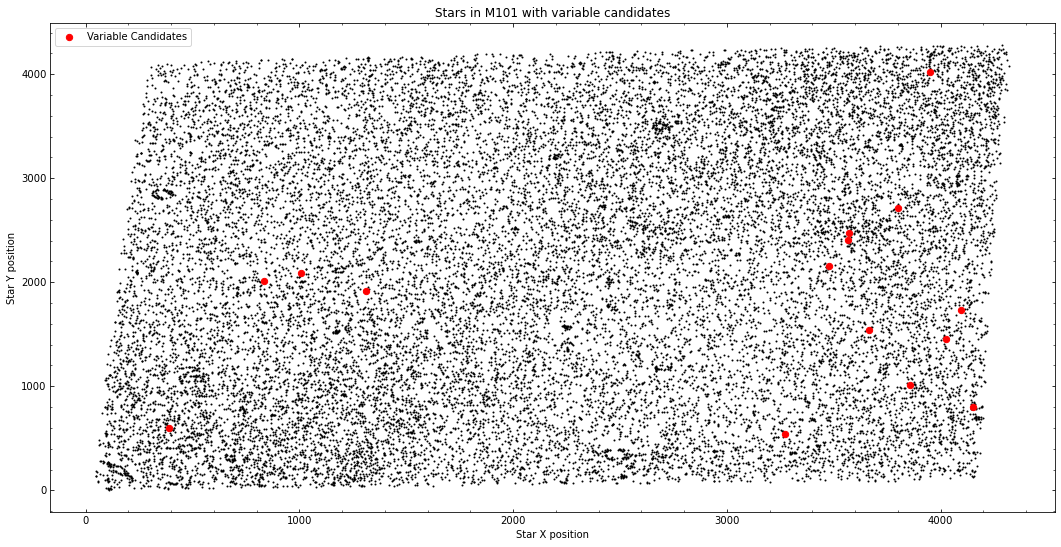

In [37]:
plt.figure(figsize=(18,9))
plt.scatter(X[want0],Y[want0],s=1, color = 'black')
plt.scatter(variables['col3'],variables['col4'], s = 40, color = 'red',label = 'Variable Candidates')
plt.title('Stars in M101 with variable candidates')
plt.xlabel('Star X position')
plt.ylabel('Star Y position')
plt.legend()
plt.show()

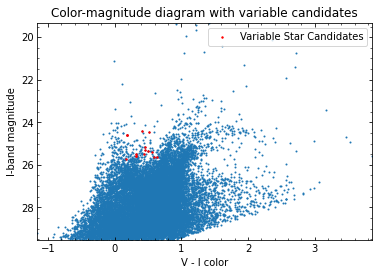

In [38]:
plt.scatter(c,i,s=1)
plt.ylim(np.max(i),np.min(i))
plt.xlim(np.min(c),np.max(c))
plt.scatter(variables['col16']-variables['col29'],variables['col29'],s=2, color = 'red', label = 'Variable Star Candidates')
plt.xlabel('V - I color')
plt.ylabel('I-band magnitude')
plt.title('Color-magnitude diagram with variable candidates')
plt.legend()
plt.show()


In [39]:
print(len(variables))

15
